In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
import diff_tools as dt

In [4]:
# define constants
delta = 1E-2
k = 1
k_prime = k * np.sqrt(1 + 2*delta)


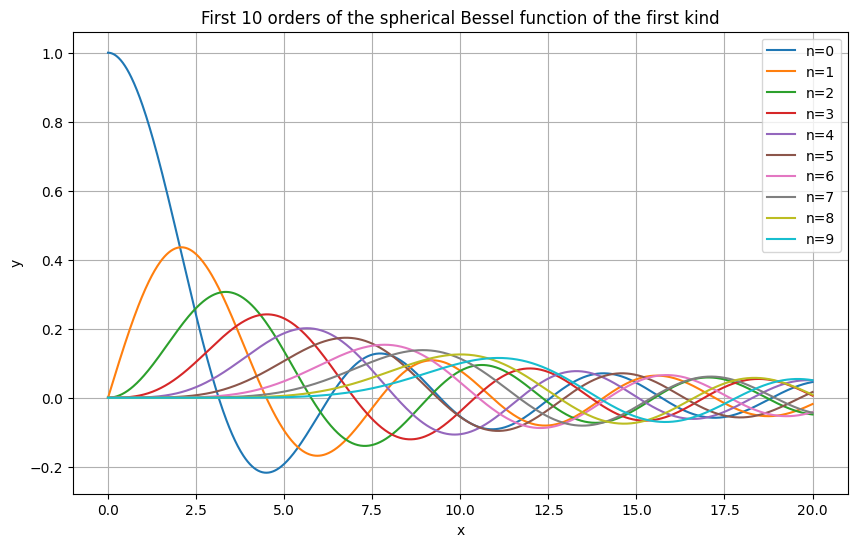

In [6]:
x = np.linspace(0, 20, 1000)  # Range of x
orders = range(10)  # Orders from 0 to 9

plt.figure(figsize=(10, 6))

for n in orders:
    y = special.spherical_jn(n, x)  # Compute the spherical Bessel function of order n
    plt.plot(x, y, label=f'n={n}')

plt.title('First 10 orders of the spherical Bessel function of the first kind')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\natha\AppData\Local\Temp\ipykernel_31508\2485501999.py:16: RuntimeWarning: overflow encountered in square
  out_sum += np.abs(spherical_jn(n, k*x_2) + spherical_yn(n, k*x_2))**2
C:\Users\natha\AppData\Local\Temp\ipykernel_31508\2485501999.py:16: RuntimeWarning: overflow encountered in add
  out_sum += np.abs(spherical_jn(n, k*x_2) + spherical_yn(n, k*x_2))**2


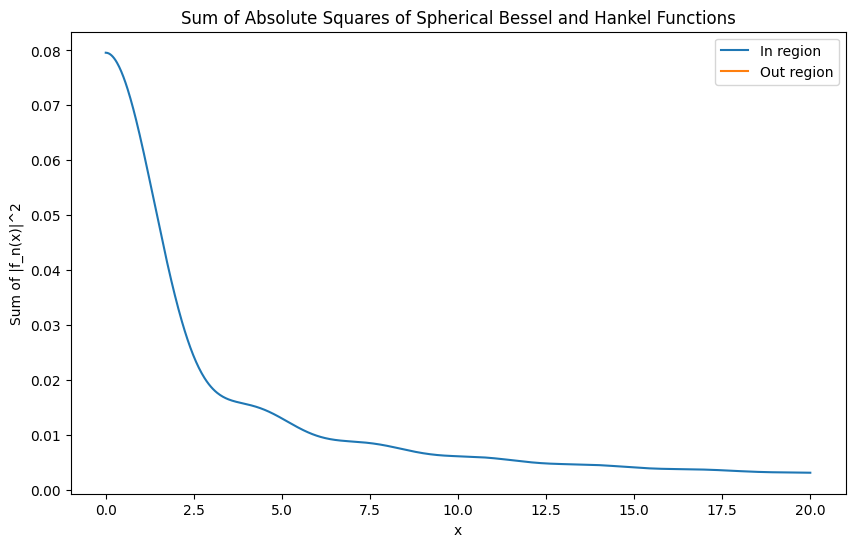

In [26]:
# Define the range of x values
x_1 = np.linspace(0, 20, 1000)
x_2 = np.linspace(20, 40, 1000)

# Define the number of orders to sum over
max_order = 3200

# Initialize an array to hold the sum of the Bessel functions
in_sum = np.zeros_like(x_1)
out_sum = np.zeros_like(x_2)


# Calculate the sum of the spherical Bessel function values over the range of orders
for n in range(max_order):
    in_sum += np.abs(spherical_jn(n, k_prime*x_1))**2
    out_sum += np.abs(spherical_jn(n, k*x_2) + spherical_yn(n, k*x_2))**2

in_sum *= 1 / (4*np.pi)
out_sum *= 1 / (4*np.pi)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_1, in_sum, label='In region')
plt.plot(x_2, out_sum, label='Out region')

# Add a legend
plt.legend()

# Add title and labels
plt.title('Sum of Absolute Squares of Spherical Bessel and Hankel Functions')
plt.xlabel('x')
plt.ylabel('Sum of |f_n(x)|^2')

# Show the plot
plt.show()

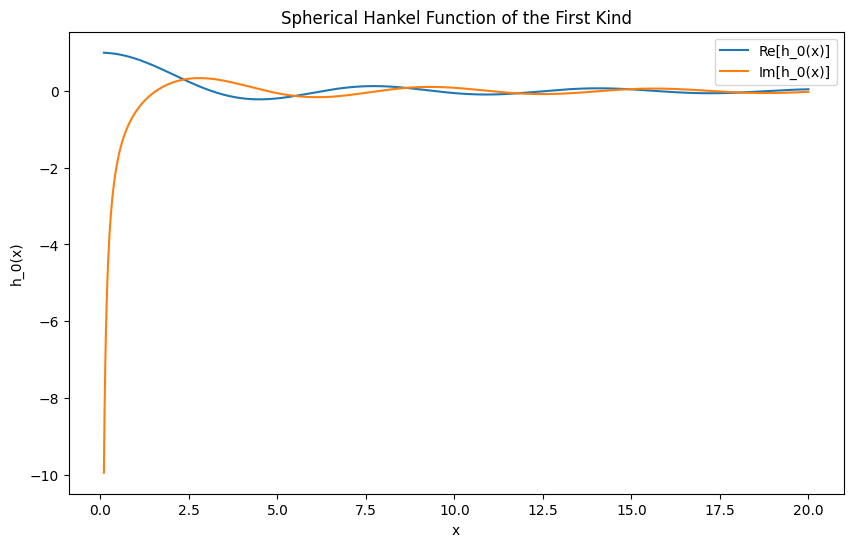

In [20]:
# Define the order of the spherical Hankel function
n = 0

# Define the range of x values
x = np.linspace(0.1, 20, 1000)  # Start from 0.1 to avoid division by zero

# Calculate the spherical Bessel function of the first kind
j_n = spherical_jn(n, x)

# Calculate the spherical Bessel function of the second kind
y_n = spherical_yn(n, x)

# Calculate the spherical Hankel function of the first kind
h_n = j_n + 1j * y_n

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, h_n.real, label='Re[h_' + str(n) + '(x)]')
plt.plot(x, h_n.imag, label='Im[h_' + str(n) + '(x)]')

# Add a legend
plt.legend()

# Add title and labels
plt.title('Spherical Hankel Function of the First Kind')
plt.xlabel('x')
plt.ylabel('h_' + str(n) + '(x)')

# Show the plot
plt.show()

In [5]:
def asym(k, delta):
    k_minus = k * np.sqrt(1 - 2 * delta)
    k_plus = k * np.sqrt(1 + 2 * delta)

    l = 0
    total = 0
    while True:
        alt = 1j ** (l % 4)
        Cl_minus = -1j * alt * np.sqrt(4 * np.pi * (2 * l + 1)) / (k ** 2 * (hd(l, k) * jn(l, k_minus) - np.sqrt(1 - 2 * delta) * hn(l, k) * jd(l, k_minus)))
        Cl_plus = -1j * alt * np.sqrt(4 * np.pi * (2 * l + 1)) / (k ** 2 * (hd(l, k) * jn(l, k_plus) - np.sqrt(1 + 2 * delta) * hn(l, k) * jd(l, k_plus)))
        term = np.abs(Cl_minus * jn(l, k_minus)) ** 2 - np.abs(Cl_plus * jn(l, k_plus)) ** 2
        total += term
        if l > k and np.abs(term / total) <= 1e-8:
            break
        l += 1
    return total / (4 * np.pi)
